In [1]:
#Import some modules
import numpy as np
import pandas as pd
import model_fitting as mfit
from sklearn.feature_selection import f_regression, SelectKBest, f_classif
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

#Read in the training data
X_train = pd.read_pickle('X_train')
y_train = pd.read_pickle('y_train')

In [2]:
#Get the features with a reliable relationship, return significant relationships w/Cohen's d
df = mfit.get_reliable_features(X_train, y_train)
df[df.pval == True]

,f_score,pval,cohens_d
int_rate,10426.289303,True,0.449770
dti,2144.122904,True,0.202434
revol_util,1698.801392,True,0.184864
inq_last_6mths,667.886665,True,0.108868
loan_amnt,579.765914,True,0.104691
annual_inc,521.507100,True,0.098587
has_mortgage,400.675602,True,0.088502
has_rent,381.917681,True,0.085814
total_credit_rv,378.573578,True,0.088744
for_business,281.144233,True,0.066794


In [3]:
#44 reliable features, most of which have to do with financial status, some have to do with regional properties
#Probably won't keep int_rate and loan_amnt even though they're predictive. They are contaminated by the Lending
#Club's own selection metric
len(df[df.pval == True])

44

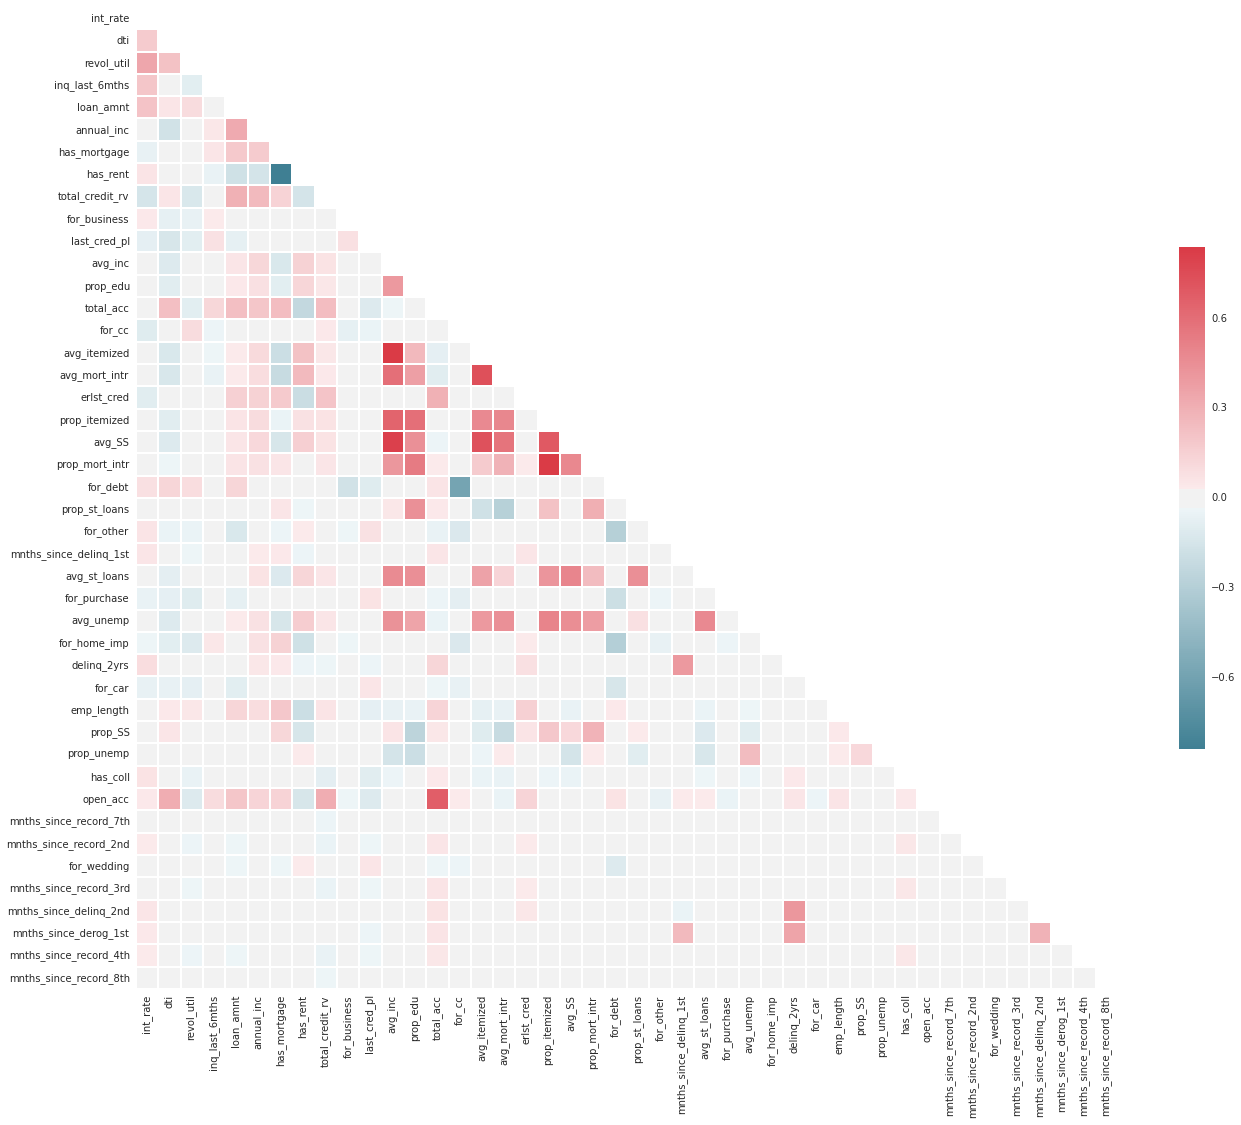

In [4]:
#Plot correlation matrix for statistically reliable features
#Some strong correlations in the social security portion of the dataset, also rent and mortgage are highly negatively
#correlated
#Some other negative correlations within the loan purpose categoricals, e.g. debt and credit card are anti-correlated
corr = mfit.plot_feature_corr(X_train[df[df.pval == True].index], f_sz = (22, 18))

In [5]:
#Grab the reliable features and join the labels to it
dat = X_train[df[df.pval == True].index]
dat = dat.join(y_train)
dat.replace(to_replace = {'loan_status': {0:'Paid', 1:'Defaulted'}}, inplace = True)

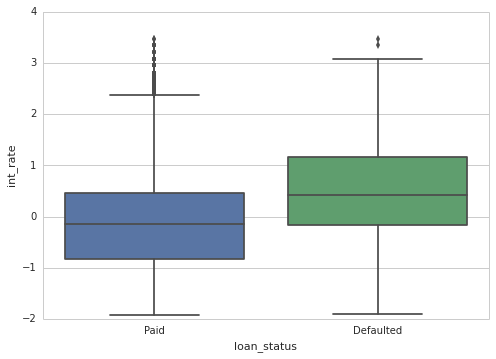

In [19]:
#Defaulted loans have higher interest rates
sns.set_style("whitegrid")
sns.boxplot(x="loan_status", y="int_rate", data=dat)

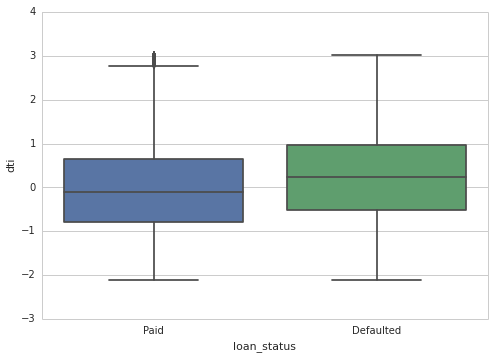

In [20]:
#Defaulted loans have higher debt to income ratios
sns.boxplot(x="loan_status", y="dti", data=dat)

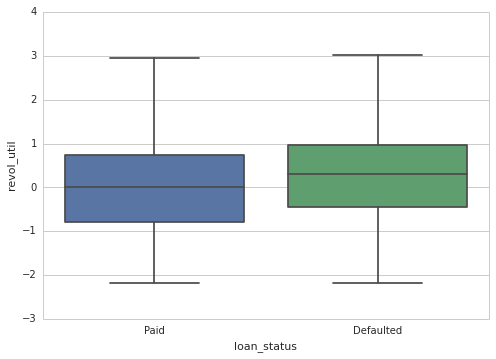

In [21]:
#Defaulted loans have higher revolving credit utilization
sns.boxplot(x="loan_status", y="revol_util", data=dat)

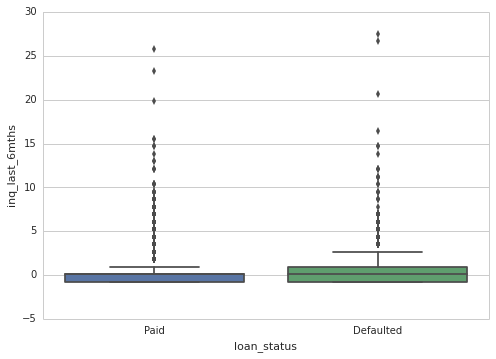

In [23]:
#Defaulted loans have more inquiries in the past six months
#Data are highly skewed
sns.boxplot(x="loan_status", y="inq_last_6mths", data=dat)

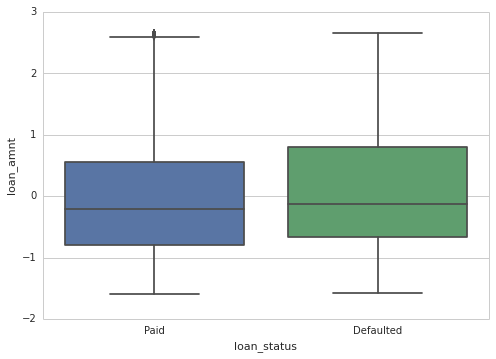

In [25]:
#Defaulted loans tend to be for larger amounts
sns.boxplot(x="loan_status", y="loan_amnt", data=dat)

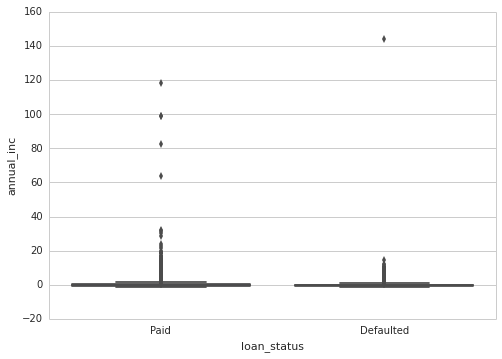

In [26]:
#Annual income, data are very skewed
sns.boxplot(x="loan_status", y="annual_inc", data=dat)

In [31]:
#Borrowers who default tend to have lower incomes
dat.groupby('loan_status').annual_inc.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Defaulted,31459.0,-0.116169,1.054106,-1.137925,-0.537661,-0.270283,0.097362,144.290693
Paid,140020.0,0.026100,0.985561,-1.150959,-0.454105,-0.136594,0.297895,118.141055


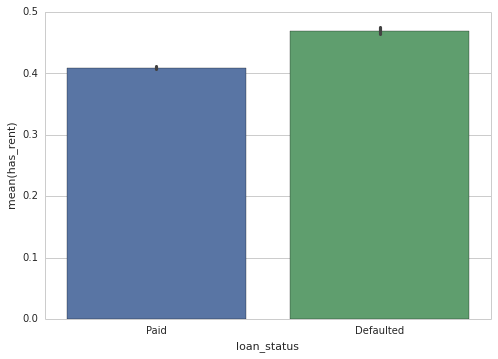

In [38]:
#Borrowers who default are more likely to be renters
sns.barplot(x="loan_status", y="has_rent", data=dat)

In [39]:
dat.groupby('loan_status').has_rent.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Defaulted,31459.0,0.469500,0.499077,0.0,0.0,0.0,1.0,1.0
Paid,140020.0,0.409377,0.491721,0.0,0.0,0.0,1.0,1.0


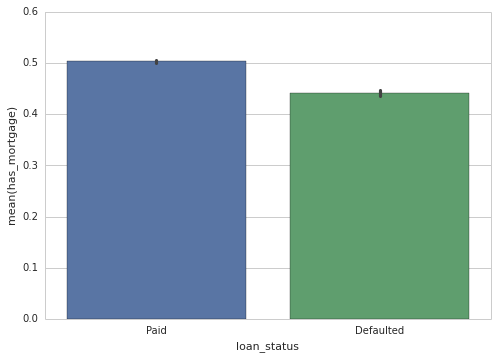

In [36]:
#Borrowers who default are less likely to have a mortgage
sns.barplot(x="loan_status", y="has_mortgage", data=dat)

In [40]:
dat.groupby('loan_status').has_mortgage.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Defaulted,31459.0,0.441654,0.496592,0.0,0.0,0.0,1.0,1.0
Paid,140020.0,0.504021,0.499986,0.0,0.0,1.0,1.0,1.0


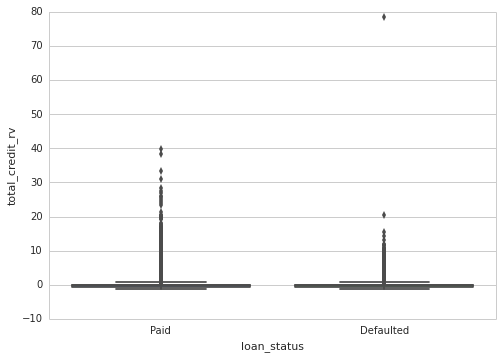

In [41]:
#Total credit revolving, data are very skewed
sns.boxplot(x="loan_status", y="total_credit_rv", data=dat)

In [42]:
#Borrowers who default tend to have lower total revolving credit
dat.groupby('loan_status').total_credit_rv.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Defaulted,31459.0,-0.099018,0.912239,-1.180234,-0.590048,-0.083604,-0.000674,78.522807
Paid,140020.0,0.022247,1.017360,-1.180234,-0.510293,-0.000674,0.032040,39.913469


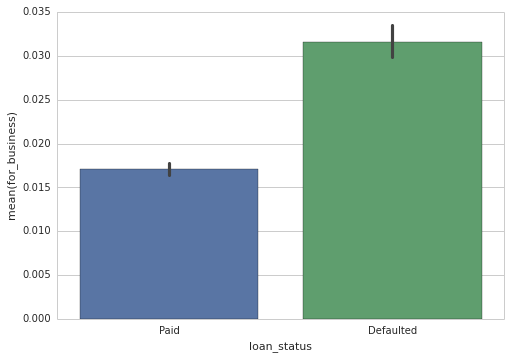

In [43]:
#Borrowers who default are more likely to be borrowing for a business
sns.barplot(x="loan_status", y="for_business", data=dat)

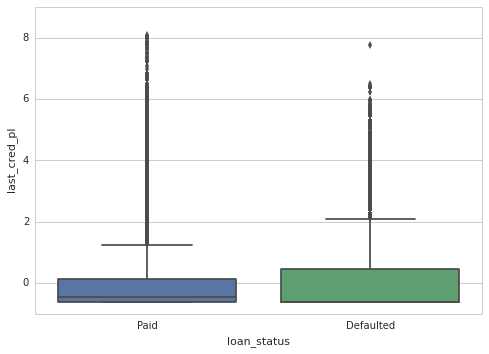

In [44]:
#Borrowers who default tend to have less recent credit pull dates
sns.boxplot(x="loan_status", y="last_cred_pl", data=dat)

In [45]:
dat.groupby('loan_status').last_cred_pl.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Defaulted,31459.0,0.080565,1.064092,-0.624676,-0.624676,-0.613570,0.472010,7.751788
Paid,140020.0,-0.018101,0.984127,-0.624676,-0.624676,-0.455314,0.149945,8.093288


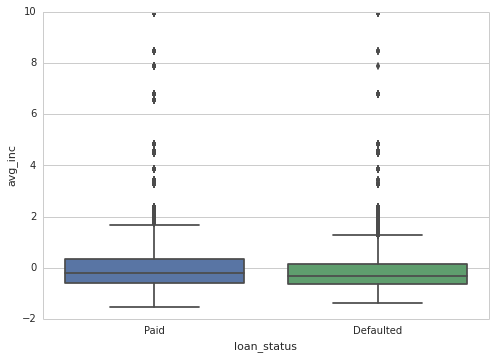

In [48]:
#Borrowers who default tend to be from regions with a lower average income
sns.boxplot(x="loan_status", y="avg_inc", data=dat)

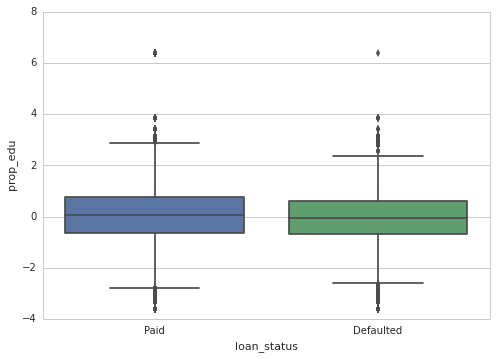

In [49]:
#Borrowers from regions with a lower proportion of tax returns with an educational credit are more likely to default
sns.boxplot(x="loan_status", y="prop_edu", data=dat)

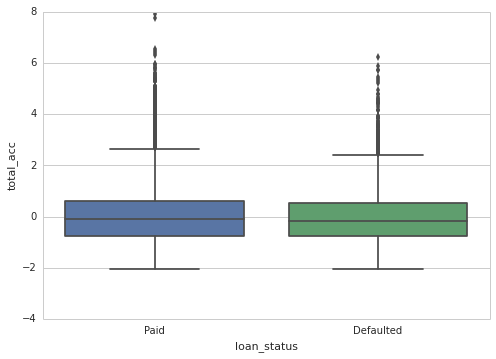

In [50]:
#Borrowers who default tend to have fewer accounts
sns.boxplot(x="loan_status", y="total_acc", data=dat)

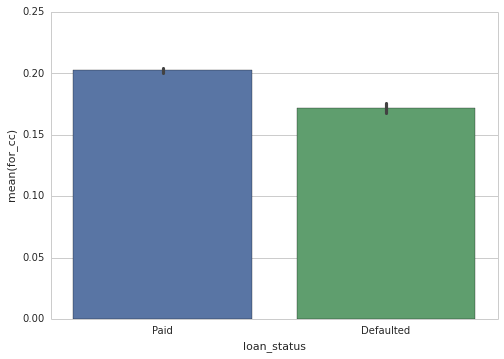

In [51]:
#Borrowers who default are less likely to be borrowing to pay off credit card debt
sns.barplot(x="loan_status", y="for_cc", data=dat)

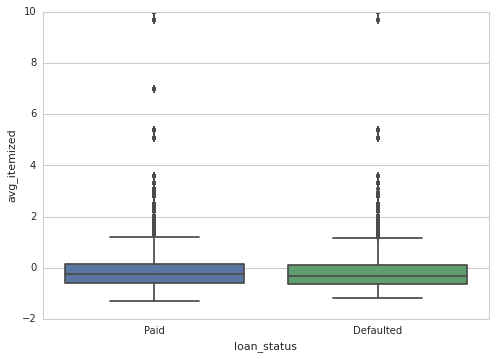

In [52]:
#Borrowers who default tend to be from regions with fewer itemized deductions
sns.boxplot(x="loan_status", y="avg_itemized", data=dat)

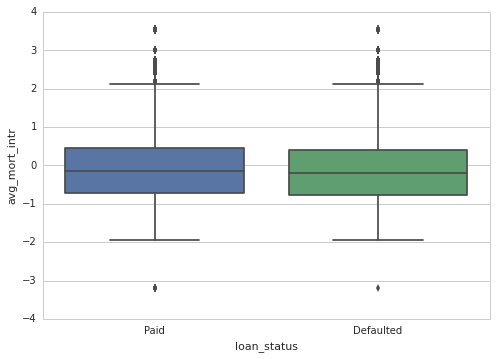

In [53]:
#Borrowers who default tend to be from regions with fewer mortgage interest deductions
sns.boxplot(x="loan_status", y="avg_mort_intr", data=dat)

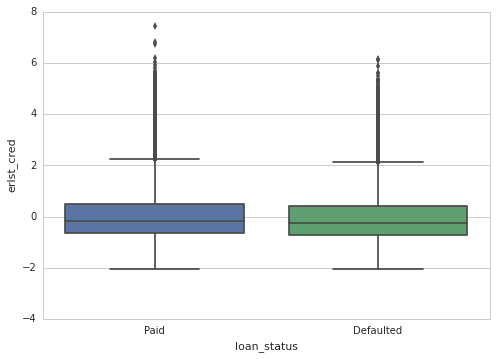

In [54]:
#Borrowers who default tend to have shorter credit histories
sns.boxplot(x="loan_status", y="erlst_cred", data=dat)

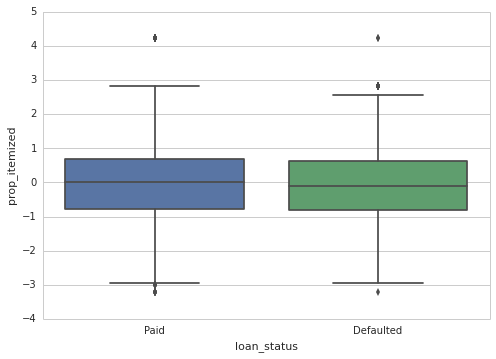

In [55]:
#Borrowers who default tend to be from a region with a lower proportion of returns with itemized deductions
sns.boxplot(x="loan_status", y="prop_itemized", data=dat)

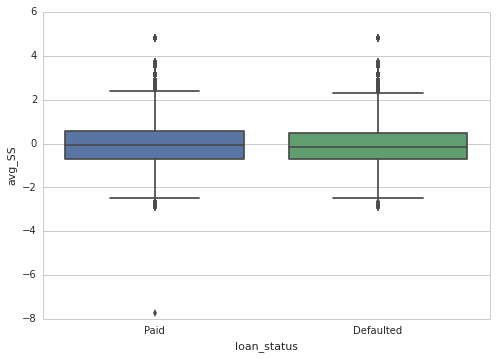

In [56]:
#Borrowers who default tend to be from regions with lower average social security payments
sns.boxplot(x="loan_status", y="avg_SS", data=dat)

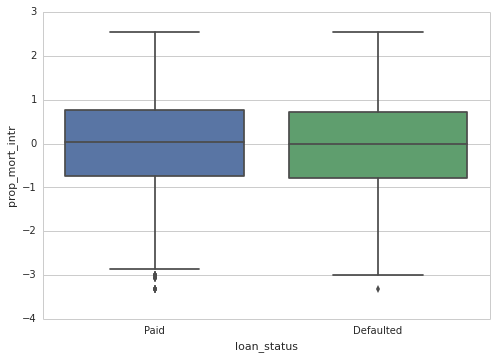

In [57]:
#Borrowers who default tend to be from regions with a lower proportion of returns with mortgage interest deductions
sns.boxplot(x="loan_status", y="prop_mort_intr", data=dat)

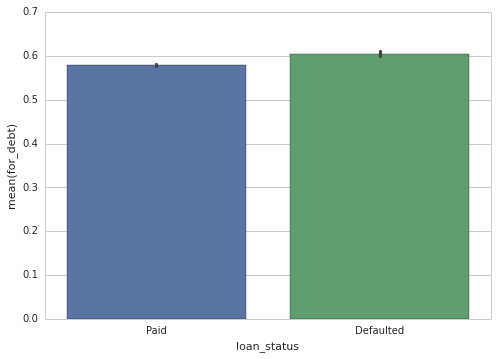

In [58]:
#Borrowers who default are more likely to be borrowing for debt consolidation
sns.barplot(x="loan_status", y="for_debt", data=dat)

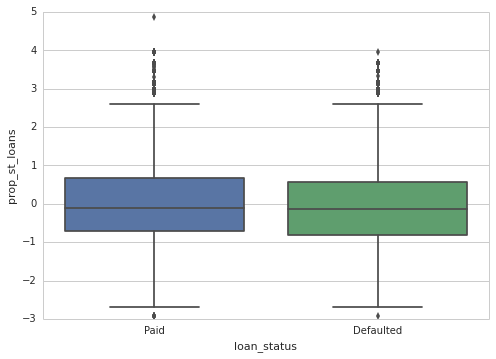

In [59]:
#Borrowers who default are more likely to be from regions with a lower proportion of returns with student loan deductions
sns.boxplot(x="loan_status", y="prop_st_loans", data=dat)

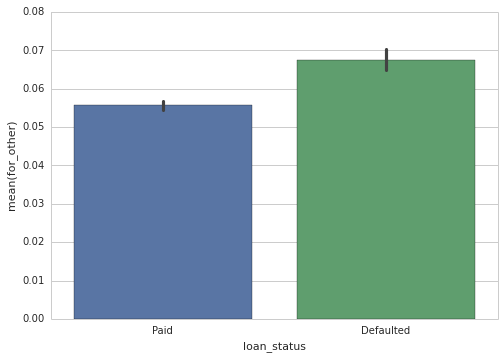

In [60]:
#Borrowers who default are more likely to be borrowing for "other" as the purpose
sns.barplot(x="loan_status", y="for_other", data=dat)

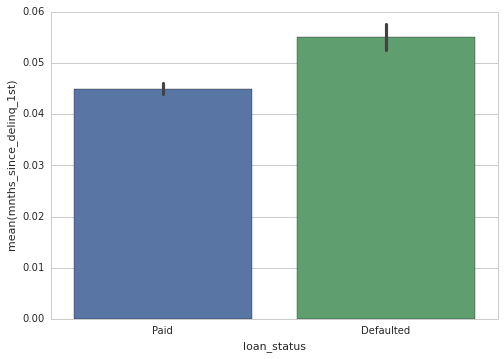

In [62]:
#Borrowers who default are more likely to have had a default in the first time decile before the present loan
sns.barplot(x="loan_status", y="mnths_since_delinq_1st", data=dat)

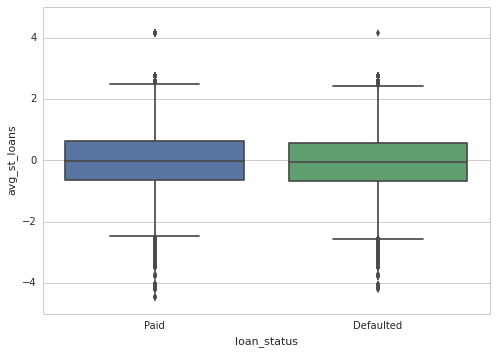

In [63]:
#Borrowers who default tend to be from regions with a lower average student loan deduction
sns.boxplot(x="loan_status", y="avg_st_loans", data=dat)

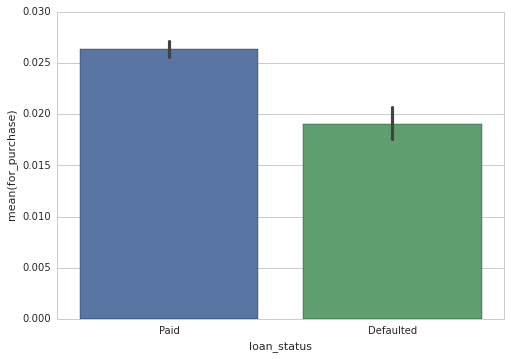

In [64]:
#Borrowers who default are less likely to be borrowing for a major purchase
sns.barplot(x="loan_status", y="for_purchase", data=dat)

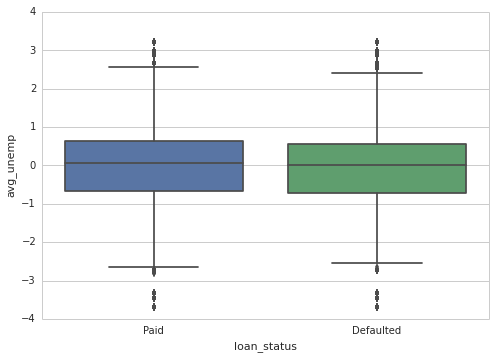

In [65]:
#Borrowers who default tend to be from regions with lower average taxable unemployment compensation
sns.boxplot(x="loan_status", y="avg_unemp", data=dat)

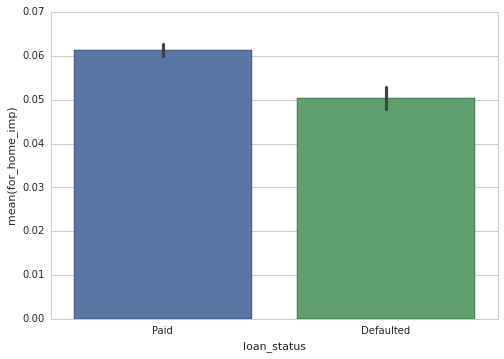

In [66]:
#Borrowers who default are less likely to be borrowing for home improvement
sns.barplot(x="loan_status", y="for_home_imp", data=dat)

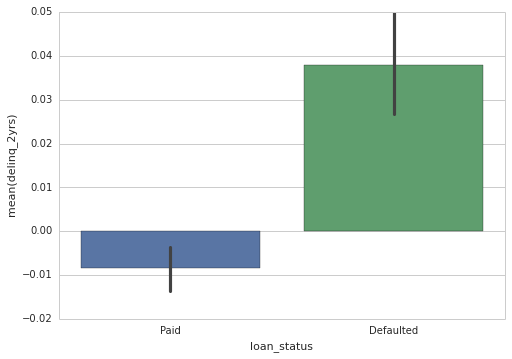

In [68]:
#Borrowers who default tend to have more delinquencies in the past two years
sns.barplot(x="loan_status", y="delinq_2yrs", data=dat)

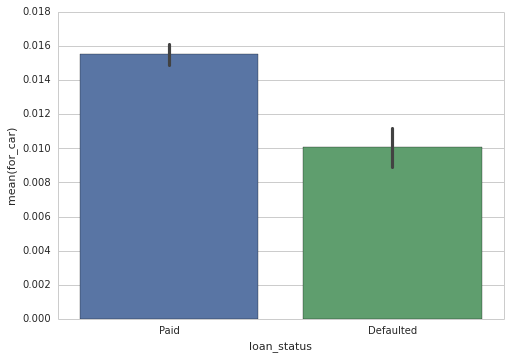

In [69]:
#Borrowers who default are less likely to be borrowing for a car
sns.barplot(x="loan_status", y="for_car", data=dat)

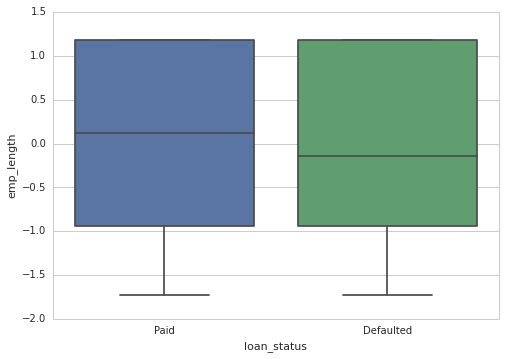

In [70]:
#Borrowers who default tend to have shorter lengths of employment
sns.boxplot(x="loan_status", y="emp_length", data=dat)

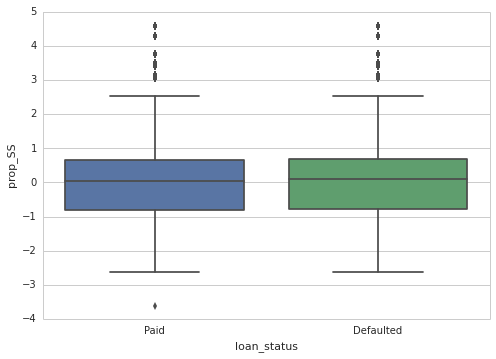

In [71]:
#Borrowers who default tend to be from regions with a higher proportion of returns with social security reported
sns.boxplot(x="loan_status", y="prop_SS", data=dat)

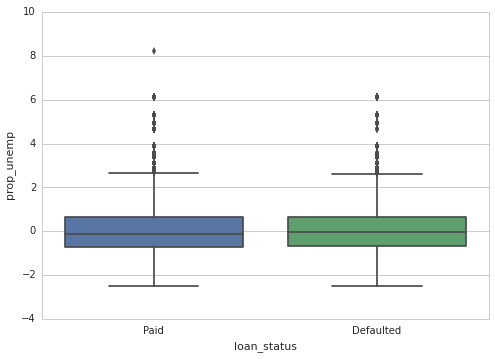

In [72]:
#Borrowers who default tend to be from regions with a higher proportion of unemployment returns
#So, less is being paid out across a greater proportion of people in regions with default
sns.boxplot(x="loan_status", y="prop_unemp", data=dat)

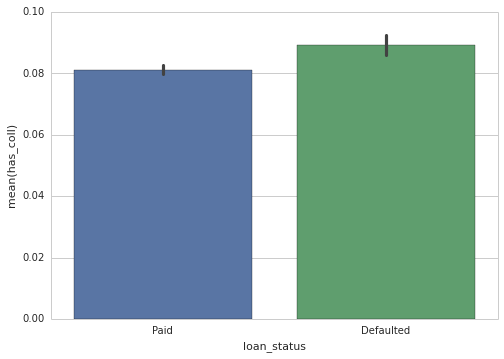

In [73]:
#Borrowers who default are more likely to have collections against them
sns.barplot(x="loan_status", y="has_coll", data=dat)

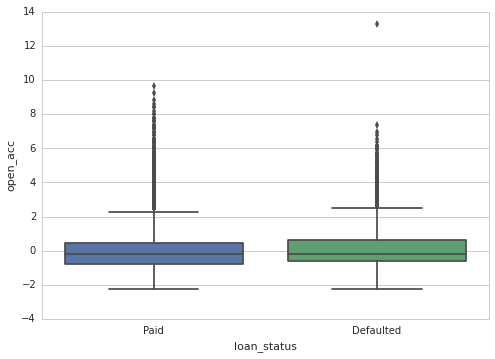

In [74]:
#Borrowers who default tend to have more open accounts
sns.boxplot(x="loan_status", y="open_acc", data=dat)

In [75]:
dat.groupby('loan_status').open_acc.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Defaulted,31459.0,0.023288,1.009992,-2.227783,-0.591752,-0.182744,0.635272,13.314515
Paid,140020.0,-0.005232,0.997674,-2.227783,-0.796256,-0.182744,0.430768,9.633444


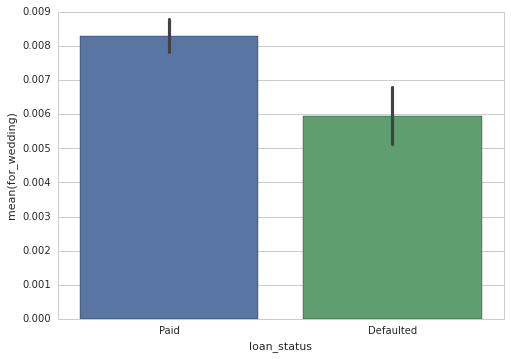

In [76]:
#Borrowers who default are less likely to be borrowing for a wedding
sns.barplot(x="loan_status", y="for_wedding", data=dat)

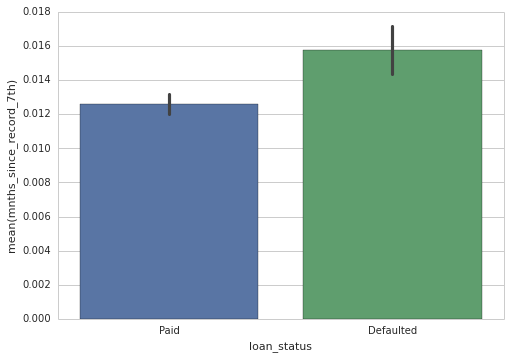

In [77]:
#The months_since_record fields seem to be inconsistent with respect to decile
#These are small effect sizes, so it seems likely that these aren't meaningfull effects
sns.barplot(x="loan_status", y="mnths_since_record_7th", data=dat)

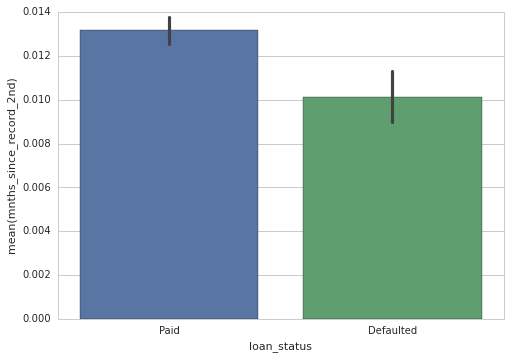

In [78]:
sns.barplot(x="loan_status", y="mnths_since_record_2nd", data=dat)

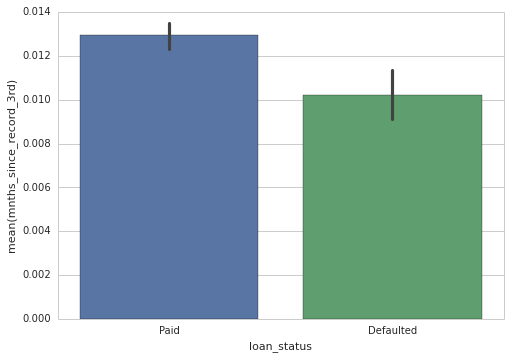

In [79]:
sns.barplot(x="loan_status", y="mnths_since_record_3rd", data=dat)

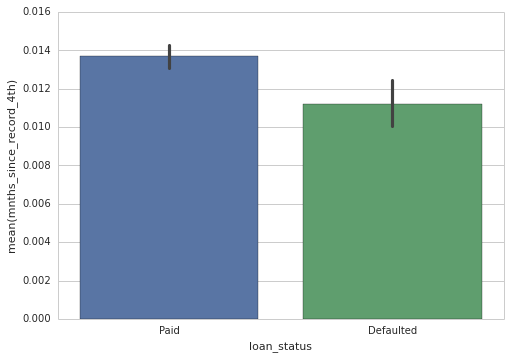

In [80]:
sns.barplot(x="loan_status", y="mnths_since_record_4th", data=dat)

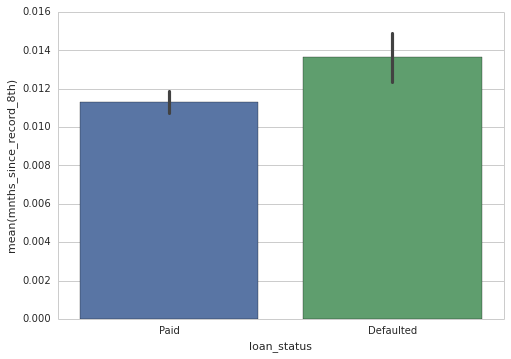

In [81]:
sns.barplot(x="loan_status", y="mnths_since_record_8th", data=dat)

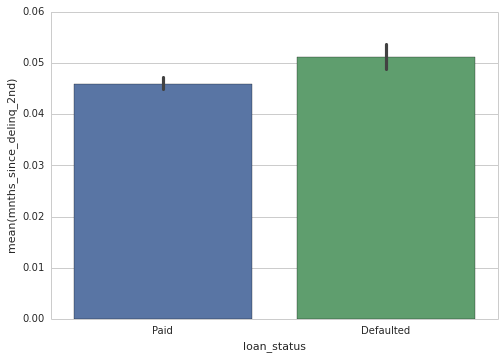

In [82]:
#Borrowers who were delinquent in the second month decile are more likely to default (same true for first decile)
sns.barplot(x="loan_status", y="mnths_since_delinq_2nd", data=dat)

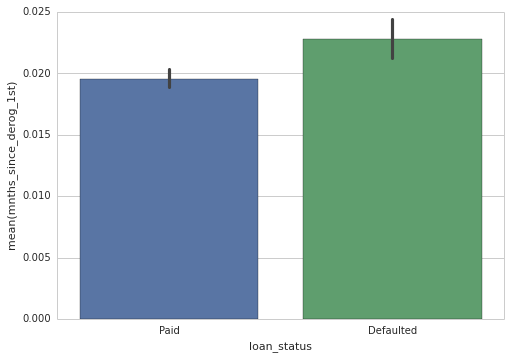

In [83]:
#Borrowers who had a recent derogatory record are more likely to default
sns.barplot(x="loan_status", y="mnths_since_derog_1st", data=dat)